In [8]:
import numpy as np

# States and observations
states = ['Rainy', 'Sunny']
observations = ['walk', 'shop', 'clean']
obs_seq = ['walk', 'shop', 'clean']

# Probabilities
start_prob = {'Rainy': 0.6, 'Sunny': 0.4}

trans_prob = {
    'Rainy': {'Rainy': 0.7, 'Sunny': 0.3},
    'Sunny': {'Rainy': 0.4, 'Sunny': 0.6}
}

emit_prob = {
    'Rainy': {'walk': 0.1, 'shop': 0.4, 'clean': 0.5},
    'Sunny': {'walk': 0.6, 'shop': 0.3, 'clean': 0.1}
}


In [9]:
def forward(obs_seq, states, start_p, trans_p, emit_p):
    alpha = [{}]
    for state in states:
        alpha[0][state] = start_p[state] * emit_p[state][obs_seq[0]]

    for t in range(1, len(obs_seq)):
        alpha.append({})
        for curr in states:
            alpha[t][curr] = sum(alpha[t-1][prev] * trans_p[prev][curr] for prev in states) * emit_p[curr][obs_seq[t]]

    return alpha


In [10]:
def backward(obs_seq, states, trans_p, emit_p):
    beta = [{} for _ in range(len(obs_seq))]
    for state in states:
        beta[-1][state] = 1

    for t in reversed(range(len(obs_seq)-1)):
        for state in states:
            beta[t][state] = sum(
                trans_p[state][next_state] * emit_p[next_state][obs_seq[t+1]] * beta[t+1][next_state]
                for next_state in states)

    return beta


In [11]:
def viterbi(obs_seq, states, start_p, trans_p, emit_p):
    V = [{}]
    path = {}

    for state in states:
        V[0][state] = start_p[state] * emit_p[state][obs_seq[0]]
        path[state] = [state]

    for t in range(1, len(obs_seq)):
        new_path = {}
        for curr in states:
            (prob, prev) = max(
                (V[t-1][prev] * trans_p[prev][curr] * emit_p[curr][obs_seq[t]], prev) for prev in states)
            V.append({} if t == len(V) else V[t])
            V[t][curr] = prob
            new_path[curr] = path[prev] + [curr]
        path = new_path

    (prob, state) = max((V[-1][s], s) for s in states)
    return (prob, path[state])


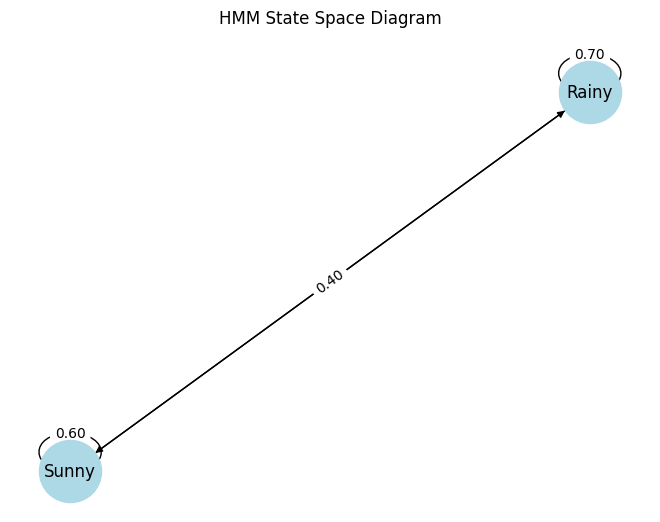

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.DiGraph()

# Add edges with transition probabilities
for from_state in states:
    for to_state in states:
        G.add_edge(from_state, to_state, label=f"{trans_prob[from_state][to_state]:.2f}")

pos = nx.spring_layout(G)
edge_labels = nx.get_edge_attributes(G, 'label')

nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("HMM State Space Diagram")
plt.show()
